In [ ]:
####### https://qiita.com/nigo1973/items/1d7495a963c23c97189c ##############

In [1]:
from PIL import Image
import os
import sys
import numpy as np
from natsort import natsorted

import cv2
import matplotlib.pyplot as plt

In [ ]:
train_images_data_path="AerialImageDataset/train"
train_gt_data_path="AerialImageDataset/gt"

In [2]:
import glob

x_train_files = glob.glob("AerialImageDataset/train/images/*")
y_train_files = glob.glob('AerialImageDataset/train/gt/*')

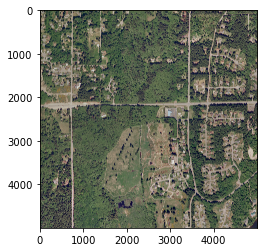

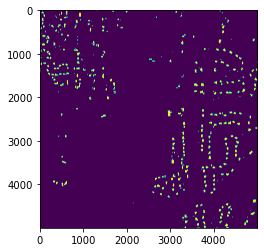

In [3]:
#画像の読み込み
im_image = Image.open(x_train_files[0])

#画像をarrayに変換
im_list_image = np.asarray(im_image)
#貼り付け
plt.imshow(im_list_image)
plt.show()

#アノテーション画像の読み込み
im_gt = Image.open(y_train_files[0])
#画像をarrayに変換
im_list_gt = np.asarray(im_gt)
#貼り付け
plt.imshow(im_list_gt)
#表示
plt.show()

In [13]:
print(im_list_gt)
print(len(im_list_gt))
print(im_list_gt.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
5000
(5000, 5000)


In [15]:
!mkdir AerialImageDataset/train_images

In [18]:
!mkdir AerialImageDataset/train_gt

In [19]:
#分割する画像サイズ，リサイズ画像のサイズ指定
height = 250
width = 250
img_size= len(im_list_gt)

#画像の分割処理関数
def ImgSplit(im):
    buff = []
    # 縦の分割枚数
    for h1 in range(int(img_size/height)):
        # 横の分割枚数
        for w1 in range(int(img_size/width)):
            w2 = w1 * height
            h2 = h1 * width
            #print(w2, h2, width + w2, height + h2)
            c = im.crop((w2, h2, width + w2, height + h2))
            buff.append(c)
    return buff

#撮像画像の分割
for i in range(len(x_train_files)):
# 画像の読み込み
    im=Image.open(x_train_files[i])
    file_name = os.path.splitext(os.path.basename(x_train_files[i]))[0]

    #画像の分割処理の実行
    hi=0
    for ig in ImgSplit(im):
        hi=hi+1
        # 保存先フォルダの指定
        ig.save("AerialImageDataset/train_images/"+ str(file_name) + '_' + str(i) +'_' + str(hi) +".png")

#アノテーション画像の分割
for i in range(len(y_train_files)):
# 画像の読み込み
    im=Image.open(y_train_files[i])
    file_name = os.path.splitext(os.path.basename(y_train_files[i]))[0]

    #画像の分割処理の実行
    hi=0
    for ig in ImgSplit(im):
        hi=hi+1
        # 保存先フォルダの指定
        ig.save("AerialImageDataset/train_gt/"+ str(file_name) + '_' + str(i) +'_' + str(hi) +".png")

In [23]:
DATA_DIR = 'AerialImageDataset/train'

#分割した画像データのディレクトリを指定する．
x_train_dir = os.path.join(DATA_DIR, 'train_images')
y_train_dir = os.path.join(DATA_DIR, 'train_gt')

#分割した画像データのファイルリストを作成する．
x_train_files = glob.glob(x_train_dir +'/*')
y_train_files = glob.glob(y_train_dir +'/*')

#分割した画像ファイルのファイル数を確認する．
print(len(x_train_files))
print(len(y_train_files))

57600
57600


In [13]:
from natsort import natsorted

X_train_files = natsorted(x_train_files)
Y_train_files = natsorted(y_train_files)

In [16]:
print(X_train_files[:10])
print(Y_train_files[:10])

['AerialImageDataset/train/train_images/chicago1_176_1.png', 'AerialImageDataset/train/train_images/chicago1_176_2.png', 'AerialImageDataset/train/train_images/chicago1_176_3.png', 'AerialImageDataset/train/train_images/chicago1_176_4.png', 'AerialImageDataset/train/train_images/chicago1_176_5.png', 'AerialImageDataset/train/train_images/chicago1_176_6.png', 'AerialImageDataset/train/train_images/chicago1_176_7.png', 'AerialImageDataset/train/train_images/chicago1_176_8.png', 'AerialImageDataset/train/train_images/chicago1_176_9.png', 'AerialImageDataset/train/train_images/chicago1_176_10.png']
['AerialImageDataset/train/train_gt/chicago1_176_1.png', 'AerialImageDataset/train/train_gt/chicago1_176_2.png', 'AerialImageDataset/train/train_gt/chicago1_176_3.png', 'AerialImageDataset/train/train_gt/chicago1_176_4.png', 'AerialImageDataset/train/train_gt/chicago1_176_5.png', 'AerialImageDataset/train/train_gt/chicago1_176_6.png', 'AerialImageDataset/train/train_gt/chicago1_176_7.png', 'Aeri

In [5]:
import shutil
import glob
import os

def move_glob(dst_path, pathname, recursive=True):
    for p in glob.glob(pathname, recursive=recursive):
        shutil.move(p, dst_path)

#Austinの撮像画像を検証用の画像データとして移動する．
move_glob('AerialImageDataset/train/val_images', 'AerialImageDataset/train/train_images/austin*.png')

#Austinのアノテーション画像を検証のアノテーション画像として移動する．
move_glob('AerialImageDataset/train/val_gt', 'AerialImageDataset/train/train_gt/austin*.png')

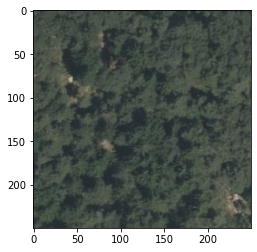

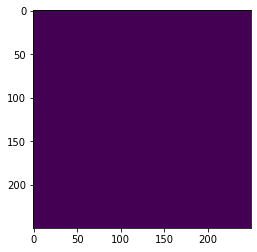

In [10]:
#撮像画像の読み込み
im_image = Image.open(x_train_files[0])

#画像をarrayに変換
im_list_image = np.asarray(im_image)
#貼り付け
plt.imshow(im_list_image)
#表示
plt.show()

#アノテーション画像の読み込み
im_gt = Image.open(y_train_files[0])

#画像をarrayに変換
im_list_gt = np.asarray(im_gt)
#貼り付け
plt.imshow(im_list_gt)
#表示
plt.show()

In [17]:
DATA_DIR = 'AerialImageDataset/train'

#分割した画像データのディレクトリを指定する．
x_val_dir = os.path.join(DATA_DIR, 'val_images')
y_val_dir = os.path.join(DATA_DIR, 'val_gt')

#分割した画像データのファイルリストを作成する．
x_val_files = glob.glob(x_val_dir +'/*')
y_val_files = glob.glob(y_val_dir +'/*')

#分割した画像ファイルのファイル数を確認する．
print(len(x_val_files))
print(len(y_val_files))

14400
14400


In [18]:
from natsort import natsorted

X_val_files = natsorted(x_val_files)
Y_val_files = natsorted(y_val_files)

In [28]:
print("####### They are same name!!! ######")
print()
print(X_val_files[:10])
print(Y_val_files[:10])

####### They are same name!!! ######

['AerialImageDataset/train/val_images/austin1_100_1.png', 'AerialImageDataset/train/val_images/austin1_100_2.png', 'AerialImageDataset/train/val_images/austin1_100_3.png', 'AerialImageDataset/train/val_images/austin1_100_4.png', 'AerialImageDataset/train/val_images/austin1_100_5.png', 'AerialImageDataset/train/val_images/austin1_100_6.png', 'AerialImageDataset/train/val_images/austin1_100_7.png', 'AerialImageDataset/train/val_images/austin1_100_8.png', 'AerialImageDataset/train/val_images/austin1_100_9.png', 'AerialImageDataset/train/val_images/austin1_100_10.png']
['AerialImageDataset/train/val_gt/austin1_100_1.png', 'AerialImageDataset/train/val_gt/austin1_100_2.png', 'AerialImageDataset/train/val_gt/austin1_100_3.png', 'AerialImageDataset/train/val_gt/austin1_100_4.png', 'AerialImageDataset/train/val_gt/austin1_100_5.png', 'AerialImageDataset/train/val_gt/austin1_100_6.png', 'AerialImageDataset/train/val_gt/austin1_100_7.png', 'AerialImageDatase

In [20]:
#学習用アノテーション画像の二値化処理
for i in range(len(y_train_files)):
    im = Image.open(y_train_files[i])
    im_list = np.asarray(im)
    X = im_list
    Y = np.where(X>1,1,X)
    pil_img = Image.fromarray(Y)
    pil_img.save(y_train_files[i])

#検証用アノテーション画像の二値化処理
for i in range(len(y_val_files)):
    im = Image.open(y_val_files[i])
    im_list = np.asarray(im)
    X = im_list
    Y = np.where(X>1,1,X)
    pil_img = Image.fromarray(Y)
    pil_img.save(y_val_files[i])

In [22]:
#画像の読み込み
im_gt = Image.open(y_train_files[1])
#画像をarrayに変換
im_list_gt = np.asarray(im_gt)

print(im_list_gt)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#################################################################################

In [ ]:
#################################################################################

In [ ]:
#################################################################################

In [4]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
import torch

if not torch.cuda.is_available():
  raise Exception("GPU not availalbe. CPU training will be too slow.")

print("device name", torch.cuda.get_device_name(0))

device name NVIDIA GeForce GTX 1080


In [6]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset as BaseDataset

In [9]:
class Dataset(BaseDataset):
    """CamVid Dataset. Read images, apply augmentation and preprocessing transformations.

    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        class_values (list): values of classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline 
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing 
            (e.g. noralization, shape manipulation, etc.)

    """

    CLASSES = ['unlabelled', 'building'] #変更

    def __init__(
            self, 
            images_dir, 
            masks_dir, 
            classes=None, 
            augmentation=None, 
            preprocessing=None,
    ):
        self.ids = os.listdir(images_dir)
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids]
        self.masks_fps = [os.path.join(masks_dir, image_id) for image_id in self.ids]

        # convert str names to class values on masks
        self.class_values = [self.CLASSES.index(cls.lower()) for cls in classes]

        self.augmentation = augmentation
        self.preprocessing = preprocessing

    def __getitem__(self, i):

        # read data
        image = cv2.imread(self.images_fps[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.masks_fps[i], 0)

        # extract certain classes from mask (e.g. cars)
        masks = [(mask == v) for v in self.class_values]
        mask = np.stack(masks, axis=-1).astype('float')
        
        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        return image, mask

    def __len__(self):
        return len(self.ids)

In [10]:
dataset.class_values

NameError: name 'dataset' is not defined

In [11]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()


In [12]:
dataset = Dataset(x_train_dir, y_train_dir, classes=['building'])

image, mask = dataset[6] # get some sample
visualize(
    image=image, 
    building_mask=mask.squeeze(),
)


NameError: name 'x_train_dir' is not defined

In [70]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-ar902psn
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-ar902psn
  Created wheel for albumentations: filename=albumentations-1.0.0-py3-none-any.whl size=98141 sha256=5d163925e8d7de25227fc5ea181b6bfa5c4eb20fd9df869f80c5b0f9101845b7
  Stored in directory: /tmp/pip-ephem-wheel-cache-3fcssxyk/wheels/c5/ca/df/fae131e2d3a8174cd8668f10bf0591fa158f0824214d3017bc
Successfully built albumentations


In [19]:
import albumentations as albu

def get_training_augmentation():
    train_transform = [

        albu.HorizontalFlip(p=0.5),

        albu.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=1, border_mode=0),

        albu.PadIfNeeded(min_height=320, min_width=320, always_apply=True, border_mode=0),
        albu.RandomCrop(height=320, width=320, always_apply=True),

        albu.IAAAdditiveGaussianNoise(p=0.2),
        albu.IAAPerspective(p=0.5),

        albu.OneOf(
            [
                albu.CLAHE(p=1),
                albu.RandomBrightness(p=1),
                albu.RandomGamma(p=1),
            ],
            p=0.9,
        ),

        albu.OneOf(
            [
                albu.IAASharpen(p=1),
                albu.Blur(blur_limit=3, p=1),
                albu.MotionBlur(blur_limit=3, p=1),
            ],
            p=0.9,
        ),

        albu.OneOf(
            [
                albu.RandomContrast(p=1),
                albu.HueSaturationValue(p=1),
            ],
            p=0.9,
        ),
    ]
    train_dataset = Dataset(
    x_train_dir, 
    y_train_dir, 
    augmentation=get_training_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
    )

    valid_dataset = Dataset(
        x_valid_dir, 
        y_valid_dir, 
        augmentation=get_validation_augmentation(), 
        preprocessing=get_preprocessing(preprocessing_fn),
        classes=CLASSES,
    )

    return albu.Compose(train_transform)


def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    test_transform = [
        albu.PadIfNeeded(384, 480)
    ]
    return albu.Compose(test_transform)


def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')


def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform

    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose

    """

    _transform = [
        albu.Lambda(image=preprocessing_fn),
        albu.Lambda(image=to_tensor, mask=to_tensor),
    ]
    return albu.Compose(_transform)

In [26]:
augmented_dataset = Dataset(
    x_train_dir, 
    y_train_dir, 
    augmentation=get_training_augmentation(), 
    classes=['building'],
)

# same image with different random transforms
for i in range(3):
    image, mask = augmented_dataset[8]
    visualize(image=image, mask=mask.squeeze(-1))

/home/tadokororyu/anaconda3/lib/python3.8/site-packages/albumentations/imgaug/transforms.py:252: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
/home/tadokororyu/anaconda3/lib/python3.8/site-packages/albumentations/imgaug/transforms.py:375: FutureWarning: This IAAPerspective is deprecated. Please use Perspective instead
  warnings.warn("This IAAPerspective is deprecated. Please use Perspective instead", FutureWarning)
/home/tadokororyu/anaconda3/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1699: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/tadokororyu/anaconda3/lib/python3.8/site-packages/albumentations/imgaug/transforms.py:222: FutureWarning: IAASharpen is deprecated. Please use Sharpen instead
  warnings.warn("IAASharpen is deprecated. Please use Sharpen inst

RecursionError: maximum recursion depth exceeded in comparison

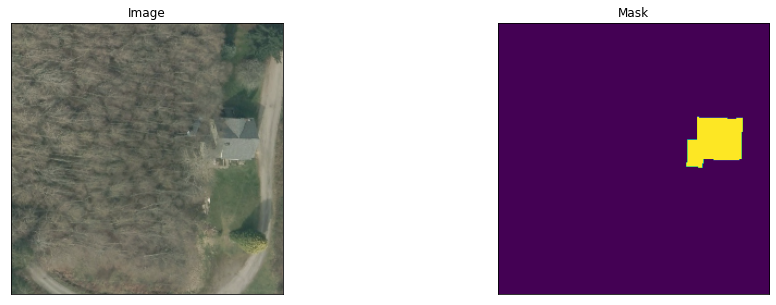

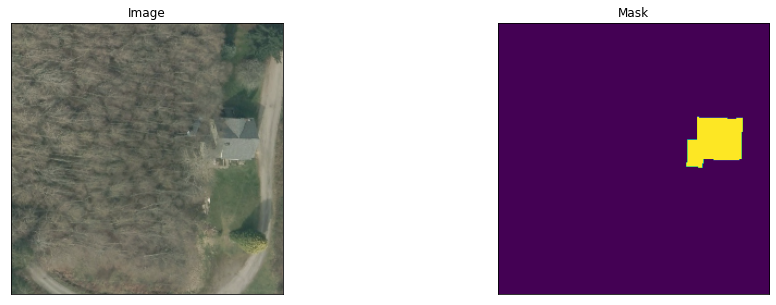

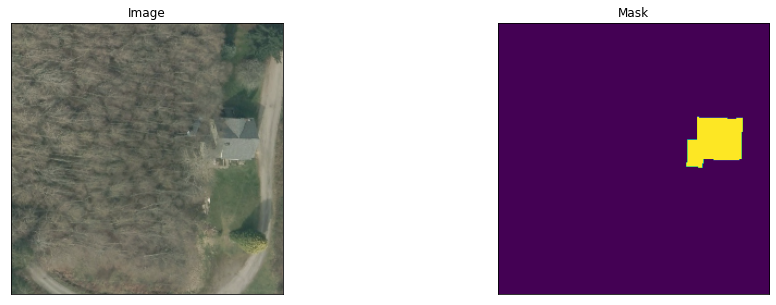

In [24]:
augmented_dataset = Dataset(
    x_train_dir, 
    y_train_dir, 
    #augmentation=get_training_augmentation(), 
    classes=['building'],
)

# same image with different random transforms
for i in range(3):
    image, mask = augmented_dataset[8]
    visualize(image=image, mask=mask.squeeze(-1))

In [25]:
DATA_DIR = 'AerialImageDataset/train'

#分割した画像データのディレクトリを指定する．
x_val_dir = os.path.join(DATA_DIR, 'val_images')
y_val_dir = os.path.join(DATA_DIR, 'val_gt')

#分割した画像データのファイルリストを作成する．
x_val_files = glob.glob(x_val_dir +'/*')
y_val_files = glob.glob(y_val_dir +'/*')

#分割した画像ファイルのファイル数を確認する．
print(len(x_val_files))
print(len(y_val_files))

14400
14400


In [27]:
import torch
import numpy as np
import segmentation_models_pytorch as smp

ENCODER = 'resnet50'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = ['building']
ACTIVATION = 'sigmoid' # could be None for logits or 'softmax2d' for multicalss segmentation
DEVICE = 'cuda'

# create segmentation model with pretrained encoder
model = smp.Unet(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=len(CLASSES), 
    activation=ACTIVATION,
)

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

In [86]:
DATA_DIR = 'AerialImageDataset/train'

#分割した画像データのディレクトリを指定する．
x_valid_dir = os.path.join(DATA_DIR, 'val_images')
y_valid_dir = os.path.join(DATA_DIR, 'val_gt')

train_dataset = Dataset(
    x_train_dir, 
    y_train_dir, 
    augmentation=get_training_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

valid_dataset = Dataset(
    x_valid_dir, 
    y_valid_dir, 
    augmentation=get_validation_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)


RuntimeError: You are trying to use a deprecated augmentation 'IAAAdditiveGaussianNoise' which depends on the imgaug library, but imgaug is not installed.

There are two options to fix this error:
1. [Recommended]. Switch to the Albumentations' implementation of the augmentation with the same API: GaussNoise - https://albumentations.ai/docs/api_reference/augmentations/transforms/#albumentations.augmentations.transforms.GaussNoise
2. Install a version of Albumentations that contains imgaug by running 'pip install -U albumentations[imgaug]'.

In [28]:
DATA_DIR = 'AerialImageDataset/train'

#分割した画像データのディレクトリを指定する．
x_valid_dir = os.path.join(DATA_DIR, 'val_images')
y_valid_dir = os.path.join(DATA_DIR, 'val_gt')

train_dataset = Dataset(
    x_train_dir, 
    y_train_dir, 
    #augmentation=get_training_augmentation(), 
    #preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

valid_dataset = Dataset(
    x_valid_dir, 
    y_valid_dir, 
    #augmentation=get_validation_augmentation(), 
    #preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)


In [29]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=12)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False, num_workers=4)

In [30]:
loss = smp.utils.losses.DiceLoss()
metrics = [
    smp.utils.metrics.IoU(threshold=0.5),
]

In [31]:
optimizer = torch.optim.Adam([ 
    dict(params=model.parameters(), lr=0.0001),
])

In [32]:
train_epoch = smp.utils.train.TrainEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
)

valid_epoch = smp.utils.train.ValidEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    device=DEVICE,
    verbose=True,
)

In [33]:
max_score = 0


#train accurascy, train loss, val_accuracy, val_loss をグラフ化できるように設定．
x_epoch_data = []
train_dice_loss = []
train_iou_score = []
valid_dice_loss = []
valid_iou_score = []


for i in range(0, 40):

    print('\nEpoch: {}'.format(i))
    train_logs = train_epoch.run(train_loader)
    valid_logs = valid_epoch.run(valid_loader)

    x_epoch_data.append(i)
    train_dice_loss.append(train_logs['dice_loss'])
    train_iou_score.append(train_logs['iou_score'])
    valid_dice_loss.append(valid_logs['dice_loss'])
    valid_iou_score.append(valid_logs['iou_score'])

    # do something (save model, change lr, etc.)
    if max_score < valid_logs['iou_score']:
        max_score = valid_logs['iou_score']
        torch.save(model, './best_model_Unet_resnet50.pth')
        print('Model saved!')

    if i == 25:
        optimizer.param_groups[0]['lr'] = 1e-5
        print('Decrease decoder learning rate to 1e-5!')


Epoch: 0
train:   0%|          | 0/7200 [00:00<?, ?it/s]


RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[8, 250, 250, 3] to have 3 channels, but got 250 channels instead